In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
#Import data.
df = pd.read_csv("gooddata.csv",index_col = "Month",parse_dates = True)

In [6]:
#Choose the model to use!
#Method for additive exponential smoothing.
model = ExponentialSmoothing(endog = df.WaterLevel, trend = 'add', seasonal='add',seasonal_periods=12, damped = False).fit(smoothing_level = 0.8)
#Method for multiplicative exponential smoothing.
model = ExponentialSmoothing(endog = df.WaterLevel, trend = 'mul', seasonal='mul',seasonal_periods=12, damped = False).fit(smoothing_level = 0.8)

<ipython-input-6-9e14b295da1e>:3: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  model = ExponentialSmoothing(endog = df.WaterLevel, trend = 'add', seasonal='add',seasonal_periods=12, damped = False).fit(smoothing_level = 0.8)
C:\Users\Alvin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
<ipython-input-6-9e14b295da1e>:5: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  model = ExponentialSmoothing(endog = df.WaterLevel, trend = 'mul', seasonal='mul',seasonal_periods=12, damped = False).fit(smoothing_level = 0.8)
C:\Users\Alvin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [7]:
#Predict data to year 2050.
predictions = model.forecast(steps = 360)
#Print the details of the model.
print(model.summary())
#Print the predicted data.
print(predictions['2025-01-01':'2025-12-01'])
print(predictions['2030-01-01':'2030-12-01'])
print(predictions['2050-01-01':'2050-12-01'])

                       ExponentialSmoothing Model Results                       
Dep. Variable:               WaterLevel   No. Observations:                  192
Model:             ExponentialSmoothing   SSE                            883.167
Optimized:                         True   AIC                            324.996
Trend:                   Multiplicative   BIC                            377.116
Seasonal:                Multiplicative   AICC                           328.949
Seasonal Periods:                    12   Date:                 Tue, 16 Nov 2021
Box-Cox:                          False   Time:                         20:26:43
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8000000                alpha                False
smoothing_trend          

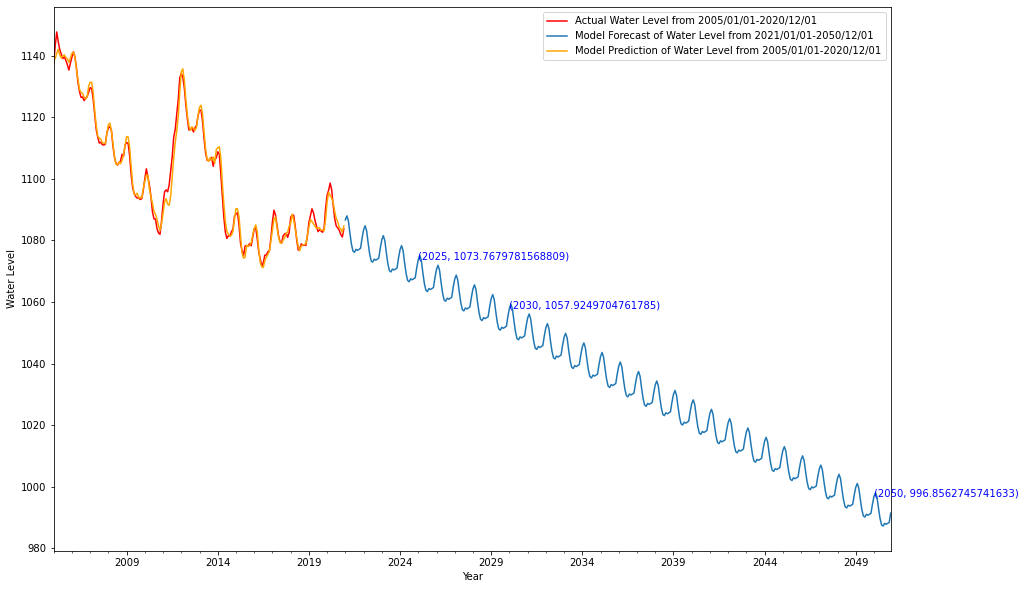

In [8]:
#Plot the original data.
df['WaterLevel']['2005-01-01':].plot(figsize=(15,10),color='r',label='Real Water Level from 2005-2020')
#Plot the predicted future data.
predictions.plot(label='Forecasted Water Level from 2021-2050')
plt.xlabel("Year")
plt.ylabel("Water Level")
#Plot the predicted original data.
predicted_original = model.predict(start='2005-01-01',end='2020-12-01')
predicted_original.plot(label='Predicted Water Level from 2005/01/01-2020/12/01',color='orange')
#Label the points.
plt.text('2025-01-01',predictions['2025-01-01'],(2025,predictions['2025-01-01']),color='b')
plt.text('2030-01-01',predictions['2030-01-01'],(2030,predictions['2030-01-01']),color='b')
plt.text('2050-01-01',predictions['2050-01-01'],(2050,predictions['2050-01-01']),color='b')
plt.legend(['Actual Water Level from 2005/01/01-2020/12/01','Model Forecast of Water Level from 2021/01/01-2050/12/01','Model Prediction of Water Level from 2005/01/01-2020/12/01'])
#Save the plot.
plt.savefig('plot.jpg')